In [ ]:
print('womp womp')

womp womp


In [ ]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')
filepath_1 = '/content/drive/My Drive/4105 Final Project/Datasets/o2Saturation.csv'
filepath_2 = '/content/drive/My Drive/4105 Final Project/Datasets/heart.csv'
filepath_3 = '/content/drive/My Drive/4105 Final Project/Datasets/heart_attack_prediction_dataset.csv'
filepath_4 = '/content/drive/My Drive/4105 Final Project/Datasets/heart_2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1 = pd.DataFrame(pd.read_csv(filepath_1))#actually not useful data
heart = pd.DataFrame(pd.read_csv(filepath_2))
heart_attack = pd.DataFrame(pd.read_csv(filepath_3))
heart_failure = pd.DataFrame(pd.read_csv(filepath_4))

In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_attack.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
heart_failure.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0, 'Male' : 1, "Female" : 0, '1' : 1, '0' : 0})

def hemisphere_map(x):
    return x.map({'Southern Hemisphere' : -1, 'Northern Hemisphere' : 1})

def countries_map(x):
    return x.map({'Argentina' : -1, 'Brazil' : -1, 'China' : -1, 'Colombia' : -1,
    'India' : -1, 'Nigeria' : -1, 'South Africa' : -1, 'South Korea' : -1, 'Thailan' : -1,
    'Vietnam' : -1, 'Australia' : 1, 'Canada' : 1, 'France' : 1, 'Germany' : 1,
    'Italy' : 1, 'Japan' : 1, 'New Zealan' : 1, 'Spain' : 1, 'United Kingdom' : 1,
    'United States' : 1})

def diet_map(x):
    return x.map({'Unhealthy' : -1, 'Average' : 0, 'Healthy' : 1})

def continent_map(x):
    return x.map({'Asia' : 0, 'Africa' : 1, 'Europe' : 2, 'North America' : 3,
    'South America' : 4, 'Australia' : 5})

def resting_ecg(x):
    return x.map({'Normal' : 0, 'ST' : 1, 'LVH' : 2})

def st_slope(x):
    return x.map({'Down' : 3, 'Flat' : 2, 'Up' : 1})

def chest_pain(x):
    return x.map({'TA' : 1, 'ATA' : 2, 'NAP' : 3, 'ASY' : 4})

def exercise_angina(x):
    return x.map({'Y' : 1, 'N' : 0})


heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['Hemisphere'] = heart_attack[['Hemisphere']].apply(hemisphere_map)
heart_attack['Country'] = heart_attack[['Country']].apply(countries_map)
heart_attack['Diet'] = heart_attack[['Diet']].apply(diet_map)
heart_attack['Continent'] = heart_attack[['Continent']].apply(continent_map)
heart_attack.fillna(0, inplace=True)


heart_failure['Sex'] = heart_failure[['Sex']].apply(gender_map)
heart_failure['ChestPainType'] = heart_failure[['ChestPainType']].apply(chest_pain)
heart_failure['RestingECG'] = heart_failure[['RestingECG']].apply(resting_ecg)
heart_failure['ExerciseAngina'] = heart_failure[['ExerciseAngina']].apply(exercise_angina)
heart_failure['ST_Slope'] = heart_failure[['ST_Slope']].apply(st_slope)


unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

heart_attack.head()

[1 0]
[-1  1]
[-1.  1.  0.]
[ 0 -1  1]
[4 3 2 0 1 5]


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,-1.0,4,-1,0
1,21,1,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,1,7,1.0,3,1,0
2,21,0,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,4,1.0,2,1,0
3,84,1,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,3,4,1.0,3,1,0
4,66,1,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,1,5,0.0,0,1,0


In [ ]:
Y_1 = heart.pop('output')
X_1 = heart

x_train1, x_val1, y_train1, y_val1 = train_test_split(X_1,Y_1, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_val1 = sc.fit_transform(x_val1)

In [ ]:
Y_2 = heart_attack.pop('Heart Attack Risk')
X_2 = heart_attack

x_train2, x_val2, y_train2, y_val2 = train_test_split(X_2,Y_2, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_val2 = sc.fit_transform(x_val2)
print(x_train2)

[[ 9.43310164e-03  6.54876032e-01  2.32374053e-02 ...  1.05267347e+00
  -1.19557945e+00  7.42909811e-01]
 [ 7.15405085e-01 -1.52700656e+00  4.06983931e-01 ...  1.05267347e+00
   5.64397858e-01  7.42909811e-01]
 [-3.76316973e-02  6.54876032e-01  4.56499612e-01 ... -1.05568111e+00
  -1.19557945e+00  7.42909811e-01]
 ...
 [ 6.21275488e-01  6.54876032e-01 -7.57939563e-02 ...  1.05267347e+00
   5.64397858e-01  7.42909811e-01]
 [-1.31761295e-01  6.54876032e-01  1.71914947e+00 ... -1.50381925e-03
  -1.19557945e+00  7.42909811e-01]
 [-7.90668480e-01  6.54876032e-01  1.47026607e-01 ... -1.50381925e-03
  -1.19557945e+00  7.42909811e-01]]


In [ ]:
Y_3 = heart_failure.pop('HeartDisease')
X_3 = heart_failure

x_train3, x_val3, y_train3, y_val3 = train_test_split(X_3,Y_3, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train3 = sc.fit_transform(x_train3)
x_val3 = sc.fit_transform(x_val3)

In [ ]:
#PCA function
def reduceFeatures(x_t,x_v,K):
  pca = PCA(n_components=K)
  x_tr = pca.fit_transform(x_t)
  x_vr = pca.fit_transform(x_v)
  return x_tr, x_vr

#The following blocks all pertain to dataset 2

In [ ]:
#determine the optimal number of components
accuracy_high = 0.0
f1_high = 0.0
accuracies = []
equals = []
precisions = []
recalls = []
f1 = []
for K in range(1,13):
  x_t, x_v = reduceFeatures(x_train1,x_val1,K)
  clf = SVC() #redefine classifier
  clf.fit(x_t, y_train1) #fit classifier
  y_pred = clf.predict(x_v)

  accuracies.append(metrics.accuracy_score(y_val1,y_pred))
  precisions.append(metrics.precision_score(y_val1,y_pred))
  recalls.append(metrics.recall_score(y_val1,y_pred))
  f1.append(metrics.f1_score(y_val1,y_pred))
  if(metrics.accuracy_score(y_val1,y_pred) > accuracy_high):
    accuracy_high = metrics.accuracy_score(y_val1,y_pred)
    K_high = K
    f1_high = metrics.f1_score(y_val1,y_pred)
    equals.clear()
  if(metrics.accuracy_score(y_val1,y_pred) == accuracy_high):
    if(metrics.f1_score(y_val1,y_pred) > f1_high): #if accuracies are even, prioritize higher f1 score
      accuracy_high = metrics.accuracy_score(y_val1,y_pred)
      K_high = K
      f1_high = metrics.f1_score(y_val1,y_pred)
      equals.clear()
    else:
      equals.append(K)
print("Most Accurate K value: ", K_high)
print("Accuracy:", accuracy_high)
print(equals)
print(accuracies)

Most Accurate K value:  1
Accuracy: 0.819672131147541
[1, 2, 4]
[0.819672131147541, 0.819672131147541, 0.8032786885245902, 0.819672131147541, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885]


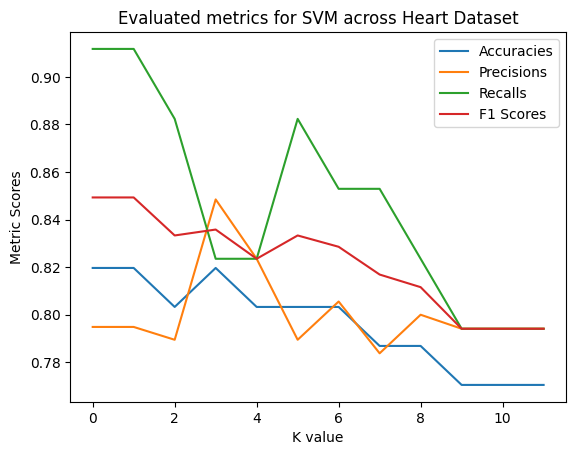

In [ ]:
plt.plot(accuracies, label="Accuracies")
plt.plot(precisions, label="Precisions")
plt.plot(recalls, label="Recalls")
plt.plot(f1, label="F1 Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.legend()
plt.title("Evaluated metrics for SVM across Heart Dataset")
plt.show()

In [ ]:
#redo PCA for confusion matrix
cnf_t, cnf_v = reduceFeatures(x_train1,x_val1,K_high)
class_cnf = SVC() #default settings, other kernels tested later
class_cnf.fit(cnf_t, y_train1)
#prepare classifier for cnf matrix
y_pred_cnf = class_cnf.predict(cnf_v)
cnfmatrix = confusion_matrix(y_val1, y_pred_cnf)
print("Accuracy:",metrics.accuracy_score(y_val1, y_pred_cnf))
print("Precision:",metrics.precision_score(y_val1, y_pred_cnf))
print("Recall:",metrics.recall_score(y_val1, y_pred_cnf))
print("F1 Score:", metrics.f1_score(y_val1,y_pred_cnf))

Accuracy: 0.819672131147541
Precision: 0.7948717948717948
Recall: 0.9117647058823529
F1 Score: 0.8493150684931507


Text(0.5, 427.9555555555555, 'Predicted label')

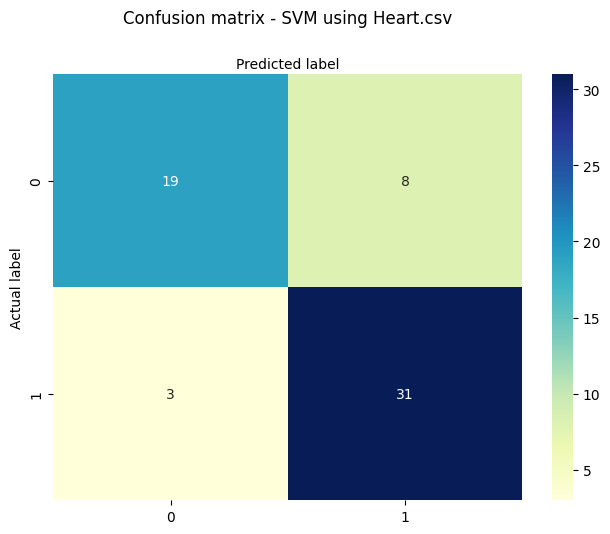

In [ ]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - SVM using Heart.csv', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
clf_heart = SVC()
xt_heart, xv_heart = reduceFeatures(x_train1,x_val1,K_high)
xt_attack, xv_attack = reduceFeatures(x_train2, x_val2, K_high)
clf_heart.fit(xt_heart,y_train1)
yp_heart = clf_heart.predict(xv_heart)
yp_attack = clf_heart.predict(xv_attack)

#metrics
acc_heart = metrics.accuracy_score(y_val1, yp_heart)
acc_attack = metrics.accuracy_score(y_val2, yp_attack)

pre_heart = metrics.precision_score(y_val1, yp_heart)
pre_attack = metrics.precision_score(y_val2, yp_attack)

rec_heart = metrics.recall_score(y_val1, yp_heart)
rec_attack = metrics.recall_score(y_val2, yp_attack)

f1_heart = metrics.f1_score(y_val1, yp_heart)
f1_attack = metrics.f1_score(y_val2, yp_attack)


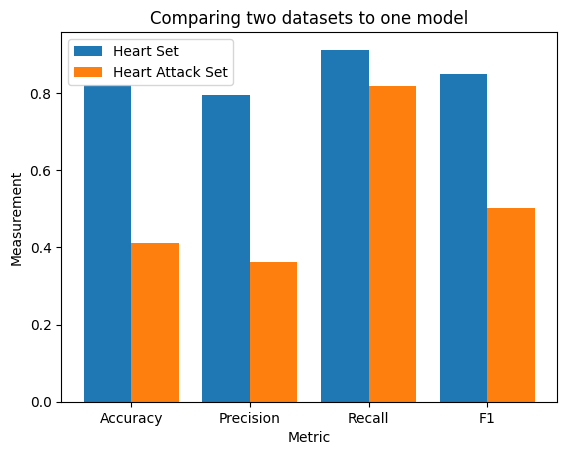

In [ ]:
X_list = ['Accuracy', 'Precision', 'Recall', 'F1']
heart_set = [acc_heart, pre_heart, rec_heart, f1_heart]
attack_set = [acc_attack, pre_attack, rec_attack, f1_attack]

X_axis = np.arange(4)

plt.bar(X_axis - 0.2, heart_set, 0.4, label = 'Heart Set')
plt.bar(X_axis + 0.2, attack_set, 0.4, label = 'Heart Attack Set')

plt.xticks(X_axis, X_list)
plt.xlabel("Metric")
plt.ylabel("Measurement")
plt.title("Comparing two datasets to one model")
plt.legend()
plt.show()

In [ ]:
clf_attack = SVC()
xt_heart, xv_heart = reduceFeatures(x_train1,x_val1,4)
xt_attack, xv_attack = reduceFeatures(x_train2, x_val2, 4)
clf_attack.fit(xt_attack,y_train2)
yp_heart = clf_attack.predict(xv_heart)
yp_attack = clf_attack.predict(xv_attack)

#metrics
acc_heart = metrics.accuracy_score(y_val1, yp_heart)
acc_attack = metrics.accuracy_score(y_val2, yp_attack)

pre_heart = metrics.precision_score(y_val1, yp_heart)
pre_attack = metrics.precision_score(y_val2, yp_attack, zero_division=0)

rec_heart = metrics.recall_score(y_val1, yp_heart, zero_division=0)
rec_attack = metrics.recall_score(y_val2, yp_attack, zero_division=0)

f1_heart = metrics.f1_score(y_val1, yp_heart, zero_division=0)
f1_attack = metrics.f1_score(y_val2, yp_attack, zero_division=0)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


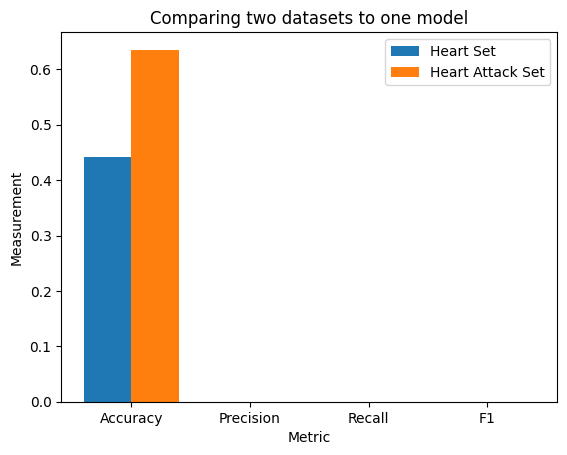

In [ ]:
X_list = ['Accuracy', 'Precision', 'Recall', 'F1']
heart_set = [acc_heart, pre_heart, rec_heart, f1_heart]
attack_set = [acc_attack, pre_attack, rec_attack, f1_attack]

X_axis = np.arange(4)

plt.bar(X_axis - 0.2, heart_set, 0.4, label = 'Heart Set')
plt.bar(X_axis + 0.2, attack_set, 0.4, label = 'Heart Attack Set')

plt.xticks(X_axis, X_list)
plt.xlabel("Metric")
plt.ylabel("Measurement")
plt.title("Comparing two datasets to one model")
plt.legend()
plt.show()

#The following blocks pertain to dataset 3

In [ ]:
#determine the optimal number of components
accuracy_high = 0.0
f1_high = 0.0
accuracies = []
equals = []
precisions = []
recalls = []
f1 = []
for K in range(1,24):
  x_t, x_v = reduceFeatures(x_train2,x_val2,K)
  clf = SVC() #redefine classifier
  clf.fit(x_t, y_train2) #fit classifier
  y_pred = clf.predict(x_v)

  accuracies.append(metrics.accuracy_score(y_val2,y_pred))
  precisions.append(metrics.precision_score(y_val2,y_pred))
  recalls.append(metrics.recall_score(y_val2,y_pred))
  f1.append(metrics.f1_score(y_val2,y_pred))
  if(metrics.accuracy_score(y_val2,y_pred) > accuracy_high):
    accuracy_high = metrics.accuracy_score(y_val2,y_pred)
    K_high = K
    f1_high = metrics.f1_score(y_val2,y_pred)
    equals.clear()
  if(metrics.accuracy_score(y_val2,y_pred) == accuracy_high):
    if(metrics.f1_score(y_val2,y_pred) > f1_high): #if accuracies are even, prioritize higher f1 score
      accuracy_high = metrics.accuracy_score(y_val2,y_pred)
      K_high = K
      f1_high = metrics.f1_score(y_val2,y_pred)
      equals.clear()
    else:
      equals.append(K)
print("Most Accurate K value: ", K_high)
print("Accuracy:", accuracy_high)
print(equals)
print(accuracies)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Most Accurate K value:  1
Accuracy: 0.6354820308043354
[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23]
[0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6349115801483172, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6349115801483172, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6349115801483172, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#The following blocks pertain to the heart failure dataset

In [ ]:
#determine the optimal number of components
accuracy_high = 0.0
f1_high = 0.0
accuracies = []
equals = []
precisions = []
recalls = []
f1 = []
for K in range(1,11):
  x_t, x_v = reduceFeatures(x_train3,x_val3,K)
  clf = SVC() #redefine classifier
  clf.fit(x_t, y_train3) #fit classifier
  y_pred = clf.predict(x_v)

  accuracies.append(metrics.accuracy_score(y_val3,y_pred))
  precisions.append(metrics.precision_score(y_val3,y_pred))
  recalls.append(metrics.recall_score(y_val3,y_pred))
  f1.append(metrics.f1_score(y_val3,y_pred))
  if(metrics.accuracy_score(y_val3,y_pred) > accuracy_high):
    accuracy_high = metrics.accuracy_score(y_val3,y_pred)
    K_high = K
    f1_high = metrics.f1_score(y_val3,y_pred)
    equals.clear()
  if(metrics.accuracy_score(y_val3,y_pred) == accuracy_high):
    if(metrics.f1_score(y_val3,y_pred) > f1_high): #if accuracies are even, prioritize higher f1 score
      accuracy_high = metrics.accuracy_score(y_val3,y_pred)
      K_high = K
      f1_high = metrics.f1_score(y_val3,y_pred)
      equals.clear()
    else:
      equals.append(K)
print("Most Accurate K value: ", K_high)
print("Accuracy:", accuracy_high)
print(equals)
print(accuracies)

Most Accurate K value:  5
Accuracy: 0.31521739130434784
[5]
[0.20108695652173914, 0.22826086956521738, 0.28804347826086957, 0.30978260869565216, 0.31521739130434784, 0.27717391304347827, 0.29891304347826086, 0.29347826086956524, 0.266304347826087, 0.2717391304347826]


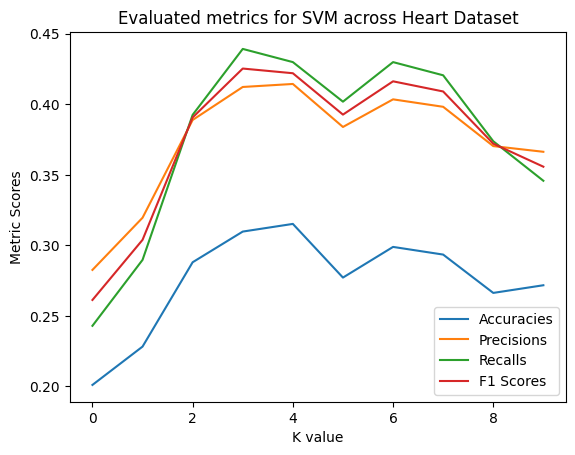

In [ ]:
plt.plot(accuracies, label="Accuracies")
plt.plot(precisions, label="Precisions")
plt.plot(recalls, label="Recalls")
plt.plot(f1, label="F1 Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.legend()
plt.title("Evaluated metrics for SVM across Heart Dataset")
plt.show()

In [ ]:
#redo PCA for confusion matrix
cnf_t3, cnf_v3 = reduceFeatures(x_train3,x_val3,K_high)
class_cnf_fail = SVC() #default settings, other kernels tested later
class_cnf_fail.fit(cnf_t3, y_train3)
#prepare classifier for cnf matrix
y_pred_cnf = class_cnf_fail.predict(cnf_v3)
cnfmatrix = confusion_matrix(y_val3, y_pred_cnf)
print("Accuracy:",metrics.accuracy_score(y_val3, y_pred_cnf))
print("Precision:",metrics.precision_score(y_val3, y_pred_cnf))
print("Recall:",metrics.recall_score(y_val3, y_pred_cnf))
print("F1 Score:", metrics.f1_score(y_val3,y_pred_cnf))

Accuracy: 0.31521739130434784
Precision: 0.4144144144144144
Recall: 0.42990654205607476
F1 Score: 0.4220183486238532


Text(0.5, 427.9555555555555, 'Predicted label')

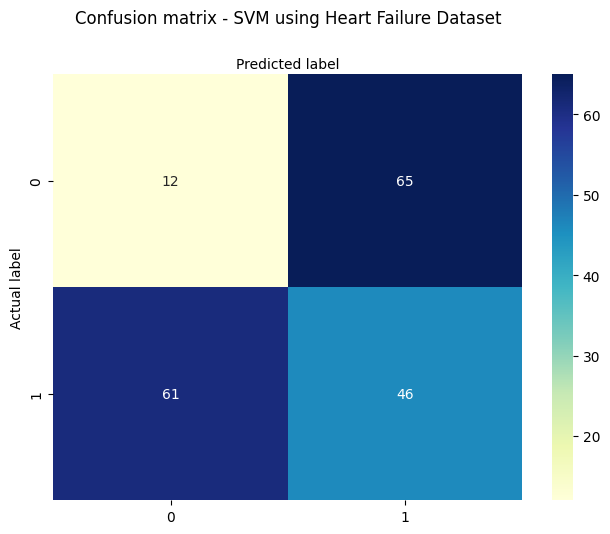

In [ ]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - SVM using Heart Failure Dataset', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#graph all metrics
clf_fail = SVC(C=1e3)
xt_fail, xv_fail = reduceFeatures(x_train3,x_val3,K_high)
failv_test, failv_val = reduceFeatures(x_train2,x_val2,K_high)
clf_fail.fit(xt_fail,y_train3)
yp_fail = clf_fail.predict(xv_fail)
yp_attack_fail = clf_fail.predict(failv_val)

#metrics
acc_fail = metrics.accuracy_score(y_val3, yp_fail)
acc_attack_fail = metrics.accuracy_score(y_val2, yp_attack_fail)

pre_fail = metrics.precision_score(y_val3, yp_fail)
pre_attack_fail = metrics.precision_score(y_val2, yp_attack_fail)

rec_fail = metrics.recall_score(y_val3, yp_fail)
rec_attack_fail = metrics.recall_score(y_val2, yp_attack_fail)

f1_fail = metrics.f1_score(y_val3, yp_fail)
f1_attack_fail = metrics.f1_score(y_val2, yp_attack_fail)


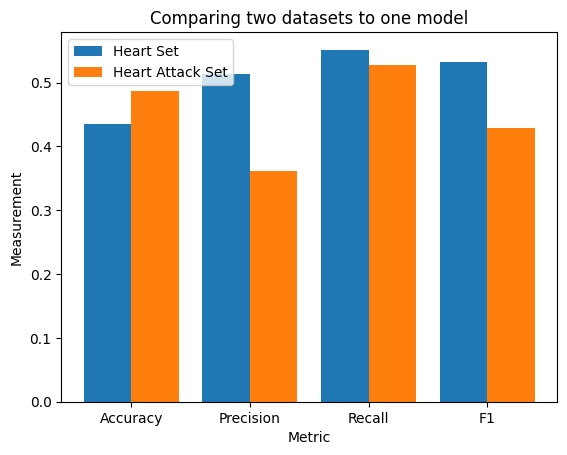

In [ ]:
X_list = ['Accuracy', 'Precision', 'Recall', 'F1']
heart_set = [acc_fail, pre_fail, rec_fail, f1_fail]
attack_set = [acc_attack_fail, pre_attack_fail, rec_attack_fail, f1_attack_fail]

X_axis = np.arange(4)

plt.bar(X_axis - 0.2, heart_set, 0.4, label = 'Heart Set')
plt.bar(X_axis + 0.2, attack_set, 0.4, label = 'Heart Attack Set')

plt.xticks(X_axis, X_list)
plt.xlabel("Metric")
plt.ylabel("Measurement")
plt.title("Comparing two datasets to one model")
plt.legend()
plt.show()